# *Salary Predictions Based on Job Descriptions*

- Author - Mamta Tomar
- Email - mamta2arya@gmail.com

# Part 1 - Problem

### Introduction
The purpose of this project is to make accurate salary preditctions that are based on known salaries so the company is able to recruit and retain top talent. This model will serve as a guide for offering competetive compensation to existing and future employees while controlling payroll expenses.

Data transformation and machine learning will be used to create a model that will predict a salary when given years of experience, job type, college degree, college major, industry, and miles from a metropolis.

### Data
The data for this model is fairly simplified as it has very few missing pieces. The raw data consists of a training dataset with the features listed above and their corresponding salaries. Twenty percent of this training dataset was split into a test dataset with corresponding salaries so accuracy and error of the model can be determined.

There is also a testing dataset that does not have any salary information available and was used as a substitute for real-world data.

### Information Used To Predict Salaries Explained:

- **Years Experience:** How many years of experience
- **Job Type:** The position held (CEO, CFO, CTO, Vice President, Manager, Janitor, and senior or junior position)
- **College Degree:** Doctoral, Masters, Bachelors, High School, or None
- **College Major:** Biology, Business, Chemistry, Computer Science, Engineering, Literature, Math, Physics, or None
- **Industry:** Auto, Education, Finance, Health, Oil, Service, or Web
- **Miles From Metropolis:** How many miles away from a major city

In [1]:
#import your libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import matplotlib as matplot
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Part 2 - Discover
## Load the dataset

In [2]:
train_features_df = pd.read_csv("train_features.csv")
train_features_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [3]:
test_features_df = pd.read_csv("test_features.csv")
test_features_df.head()


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [4]:
train_target_df = pd.read_csv('train_salaries.csv')
train_target_df.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
train_features_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [6]:
test_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


#### See lengths and dtypes of the loaded data frames

In [7]:
train_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


#### Check the shape of the dataframes


In [8]:
print(train_features_df.shape)
print(test_features_df.shape)
print(train_target_df.shape)

(1000000, 8)
(1000000, 8)
(1000000, 2)


##### The data in train_features_df and test_features_df have the same features. The data in the test_features_df will be good for testing the created models as it does not have pre-existing target variable which is salary information.

##### The data in the train_target_df has only the salary information, i.e the target variable along with jobId that corresponds with the jobId in the train_target_df. We will merge the two in a single dataframe. 

In [9]:
#merge training data with features and training data with salary - store in train_df
train_df = pd.merge(train_features_df,train_target_df, on = 'jobId')

In [10]:
# verify the information of merged training data
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [11]:
# #verify shape of the merged data-
print(train_df.shape)

(1000000, 9)


#### Check for missing values -

In [12]:
# Verifing null values
train_df.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [13]:
#Checking if any Salary attributes have '0' value
len(train_df[train_df['salary']==0])

5

In [14]:
#Displaying the rows that have '0' as their salary values
train_df[train_df['salary']==0]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


Now we know that their are 5 unique Job IDs that don't have any salary listed. It is better if we remove these rows from the dataset, since they do not contribute to the model training.

In [15]:
train_df = train_df[train_df.salary != 0]

In [16]:
train_df

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149


Once rows with 0 salary are dropped, the index values need to be re-arranged so there is no confusion in the future.

In [17]:
#Resetting the index values
print(train_df.shape)
train_df.reset_index(drop = True).head()

(999995, 9)


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [18]:
#Looking for Unique values
train_df.nunique()

jobId                  999995
companyId                  63
jobType                     8
degree                      5
major                       9
industry                    7
yearsExperience            25
milesFromMetropolis       100
salary                    279
dtype: int64

This tells us that our dataset has nearly 1 million job descriptions from 63 companies advertizing 8 unique job types in 7 different industries. There are mainly 5 Degree and 9 Major requirements included. Depending on job types, the experience feature has 25 unique values and locations that are at 100 different metrics (miles) away from closest metropolitan city.

In [19]:
#Checking for duplicate values

train_df.duplicated().any()

False

There are no duplicate values in the dataset.

Data types are checked to make sure they are appropriate corresponding to the columns using .dtypes.

In [20]:
train_df.dtypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object

We can now procede to look at some of the summary statistics to get a better understanding of the data. This mainly includes descriptive statistics concerning all the numerical data in the dataset.

This will be done in the next section as a part of the Exploratory Data Analysis (EDA).

# 3. Explore the data (EDA)
The aim of EDA is to -
- Summarize each feature variable
- Summarize target variable
- Summarize correlation between each feature and target
- Summarize correlation between features

In [21]:
#Summary Statistics for numerical data

train_df.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [22]:
print("The Average Overall Salary is: $", round(train_df['salary'].mean()),'000')
print("The Salary Standard Deviation is: ", train_df['salary'].std())

The Average Overall Salary is: $ 116 000
The Salary Standard Deviation is:  38.71716338504513


This is mainly to find out if the minimum, maximum, standard deviation being displayed in the data is appropriate/realistic or not. We can see that values of these metrics are normal.

We have given a count of the unique values in every feature earlier. We will now look at the number of different unique values exist in every column

In [23]:
# Creating a function for dataset categorical vaues
col_names = ['jobType', 'companyId','degree','major','industry']
for col in col_names:
    if col != 'jobId' and col != 'companyId':
       print(train_df[col].value_counts())

SENIOR            125886
VICE_PRESIDENT    125234
MANAGER           125120
CTO               125045
JANITOR           124971
CEO               124778
JUNIOR            124592
CFO               124369
Name: jobType, dtype: int64
HIGH_SCHOOL    236975
NONE           236853
BACHELORS      175495
DOCTORAL       175362
MASTERS        175310
Name: degree, dtype: int64
NONE           532353
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58594
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57800
Name: major, dtype: int64
WEB          143205
AUTO         142941
FINANCE      142866
EDUCATION    142819
OIL          142770
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64


In [24]:
# unique values intrain_df data -
train_df.nunique()

jobId                  999995
companyId                  63
jobType                     8
degree                      5
major                       9
industry                    7
yearsExperience            25
milesFromMetropolis       100
salary                    279
dtype: int64

The for loop created iterates through every column with categorical values in the dataset starting from Job Type to Degree, Major and Industry and counts the value of every unique entry in the respective columns along with their frequency in the dataset.

This way, we get the different number of job id's assigned to every unique entry in the categorical dataset.

# 4. Visualizing the Target Variable (Salary)

As a part of visualization, we would like to see if the target variable in the training set is distributed normally. This can be done by:

a) A Box Plot showing Inter Quartile Ranges; and

b) A Distribution Plot to visualize shaded regions specifying a data value range. (skewness and kurtosis)



In [25]:
#compute the kurtosis and skewness of salary
print('Salary Skewness:', train_df['salary'].skew())
print('Salary Kurtosis:', train_df['salary'].kurt())
print('\n')
if -0.5 <= train_df['salary'].skew() <= 0.5:
    print('Salary distribution is approximately symmetric')
elif -0.5 >  train_df['salary'] > 0.5:
    print('Salary distribution is skewed')
    

Salary Skewness: 0.34652727907668734
Salary Kurtosis: -0.025750772283374967


Salary distribution is approximately symmetric


In [26]:
#We use IQR to identify potential outliers 

stats = train_df['salary'].describe()
IQR = stats['75%'] - stats['25%']
upper_bound = stats['75%'] + 1.5 * IQR
lower_bound = stats['25%'] - 1.5 * IQR
print ('The upper and lower bounds of possible outliers are :' , (upper_bound ,lower_bound))

The upper and lower bounds of possible outliers are : (220.5, 8.5)


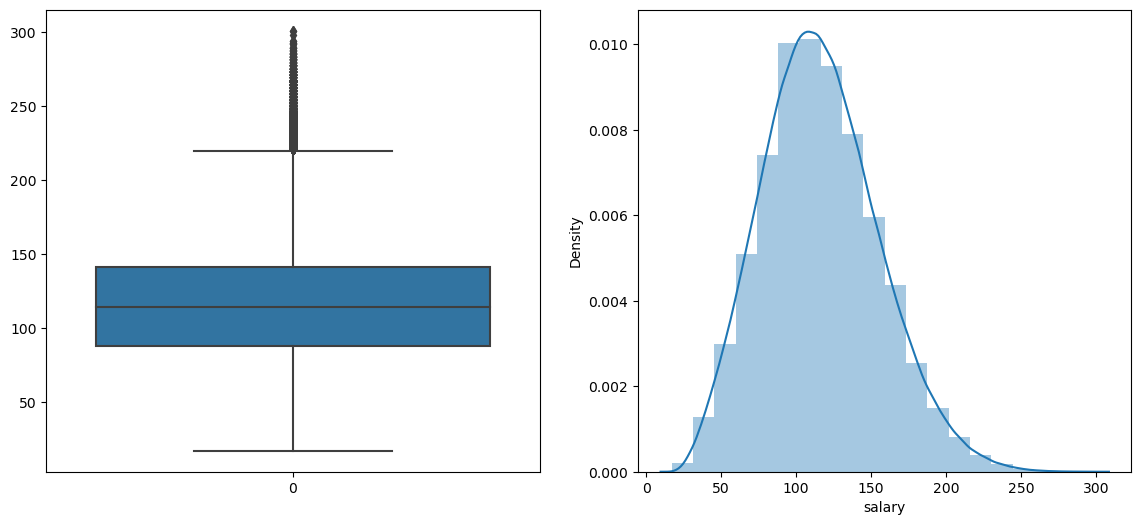

In [27]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(train_df['salary'])
plt.subplot(1,2,2)
sns.distplot(train_df['salary'], bins = 20)
plt.show()

In [28]:
print(stats)

count    999995.000000
mean        116.062398
std          38.717163
min          17.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         301.000000
Name: salary, dtype: float64


In [29]:
# Examine the outliers below the lower bound- 
train_df[train_df['salary'] < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


We can say that the findings of Skewness and Kurtosis in the previous cell is confirmed as the Salary follows an almost normal distribution with some very little amount of Skew to the right.

There can be observed some outliers in the Boxplot which will have to be analyzed for significance and cleaned if needed.

In [30]:
#Examine potential outliers above the upper bound - 
train_df.loc[train_df['salary'] > 220.5, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [31]:
#Examine the outliers for a particular type(JUNIOR) of column, jobType - 
train_df[(train_df['salary'] > 220.5) & (train_df['jobType'] == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


The high salary potential outliers seem to be either C-level executives or the Juniors are in industries such as Oil, Finance etc. who are known to have higher salaries. Hence, we do not drop them as they seem appropriate.

### Visualize numerical data with salary

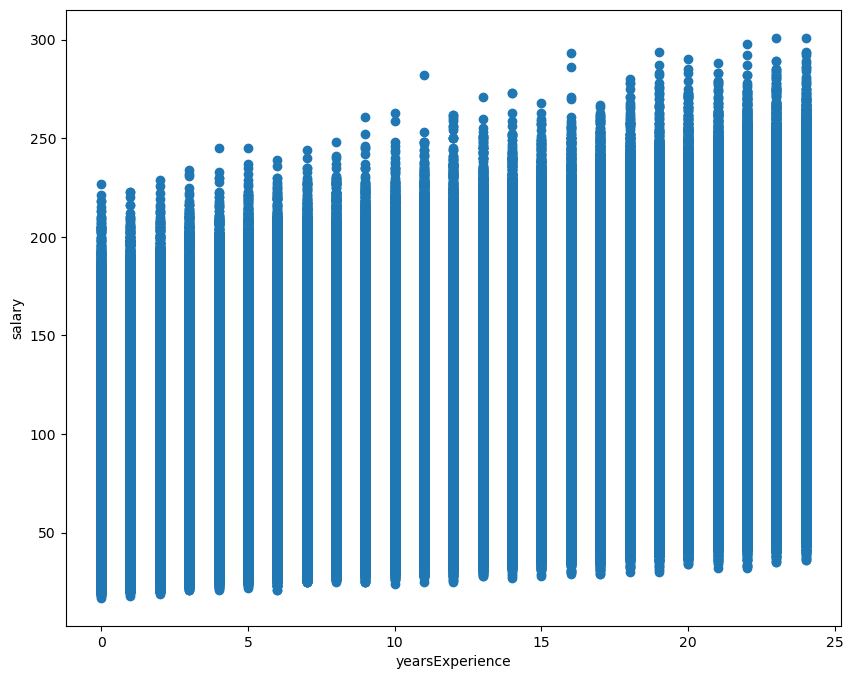

In [32]:
#scatter plots 
def scatter_data(df, col):
    plt.figure(figsize = (10,8))
    plt.scatter(df[col], df['salary'] )
    plt.ylabel('salary')
    plt.xlabel(col)
scatter_data(train_df, 'yearsExperience')

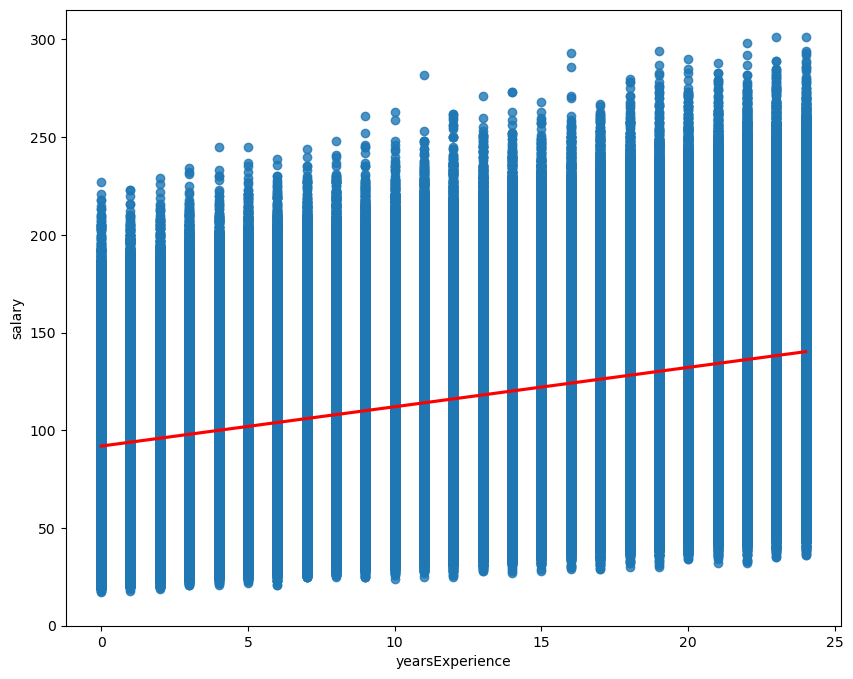

In [33]:
#regression plots
def reg_data(df, col):
    plt.figure(figsize=(10,8))
    sns.regplot(x=df[col], y = df['salary'], data = df, line_kws = {'color' : 'red'})    
    plt.ylim(0,)

#Fit a regression line to years experience to visualize it as a predictor of salary - 
reg_data(train_df, 'yearsExperience')

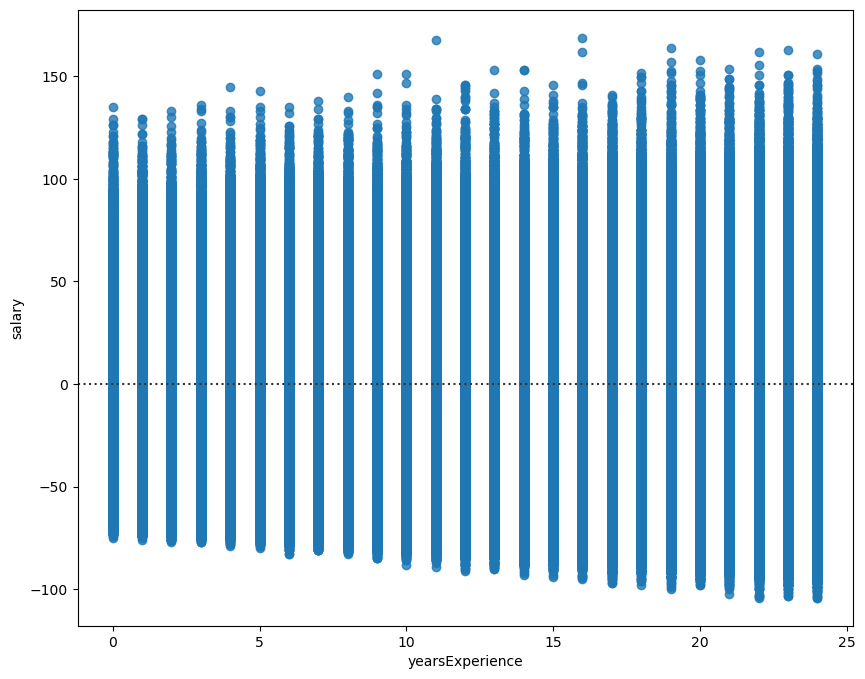

In [34]:
#residual plots 
def res_data(df,col):
    plt.figure(figsize=(10,8))
    sns.residplot(x=df[col], y = df['salary'], data = df)
    plt.show()

res_data(train_df, 'yearsExperience')

Variance in salary seems to slightly increase with increasing yearsExperience.

Data seems to be spread away from the regression line. We can also see a weak positive relationship between yearsExperience and salary.

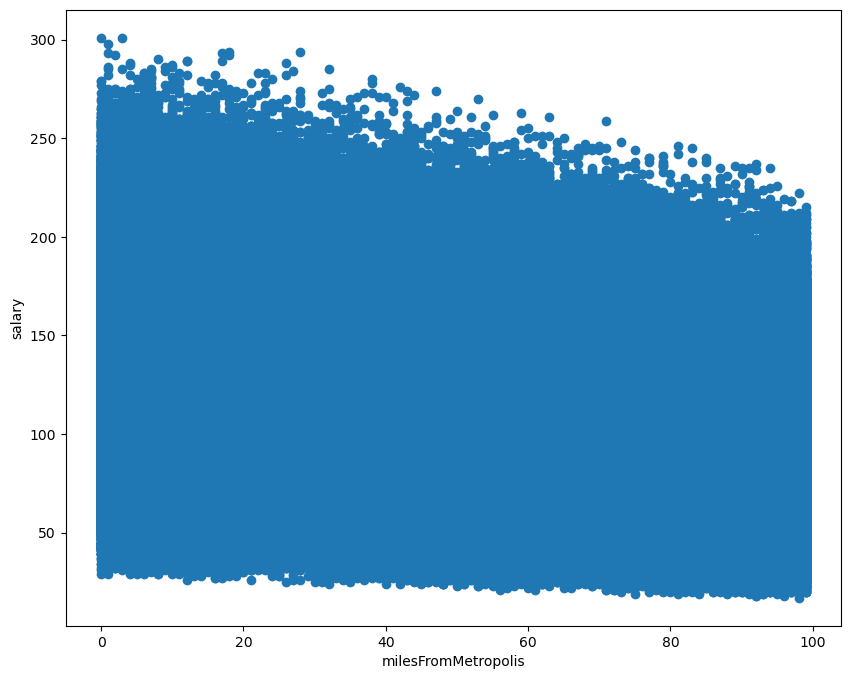

In [35]:
scatter_data(train_df, 'milesFromMetropolis')

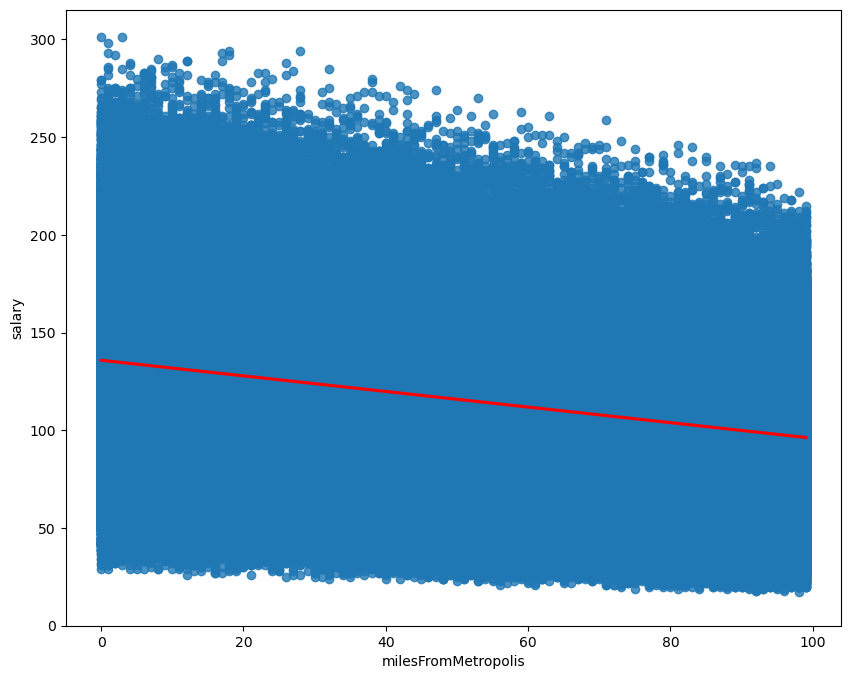

In [36]:
#Fit a regression line to miles from metropolis to visualize it as a predictor of salary -
reg_data(train_df, 'milesFromMetropolis')

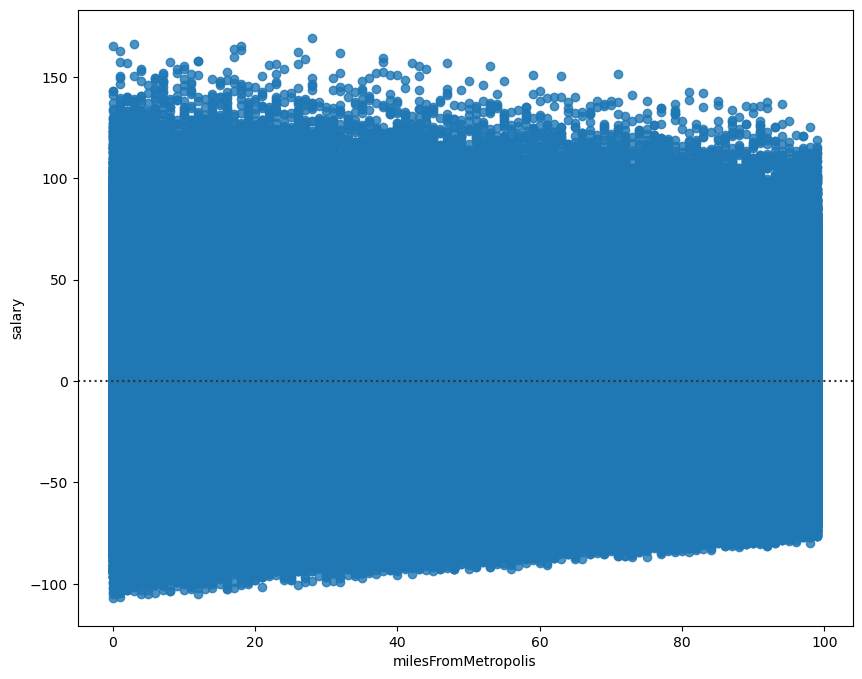

In [37]:
#Variance of milesfrom Metropolis
res_data(train_df, 'milesFromMetropolis')

Variance in salary seems to slightly decrease with increasing milesFromMetropolis.

Data is widely spread from the regression line and we can see a weak negative relationship between miles from metropolis and salary.

### Correlation between Features and Target Variable
For every independent variable with Salary, we can define a function that gives a line plot when independent variable is Numerical value and a box plot when independent variable is categorical data. 

In [38]:
def plot_var(df,col):
    #Make subplots - left be the distribution of samples on the feature and right be the dependance of salary on the feature
    plt.figure(figsize=(12,8))
    plt.subplot(1,2,1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #else change the categorical variable to category type and order their level by mean salary 
        mean=df.groupby(col)['salary'].mean()
        df[col]=df[col].astype('category').copy()
        levels = mean.sort_values().index.to_list()
        df[col].cat.reorder_categories(levels, inplace = True)
        df[col].value_counts().plot()
    plt.xticks(rotation = 40)
    plt.xlabel(col)
    plt.ylabel('Counts')
    
    plt.subplot(1,2,2)
    
    if df[col].dtype == 'int64' or col == 'Company ID':
        #plot the mean salary for each category and fill between the 
        #(mean - std, mean + std)
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
        
    else:
        sns.boxplot(x=col, y='salary', data = df.sort_values('salary'))
    
    plt.xticks(rotation = 45)
    plt.ylabel('Salaries')
    plt.title('Relationship of Salary with {}'.format(col))
    plt.show()

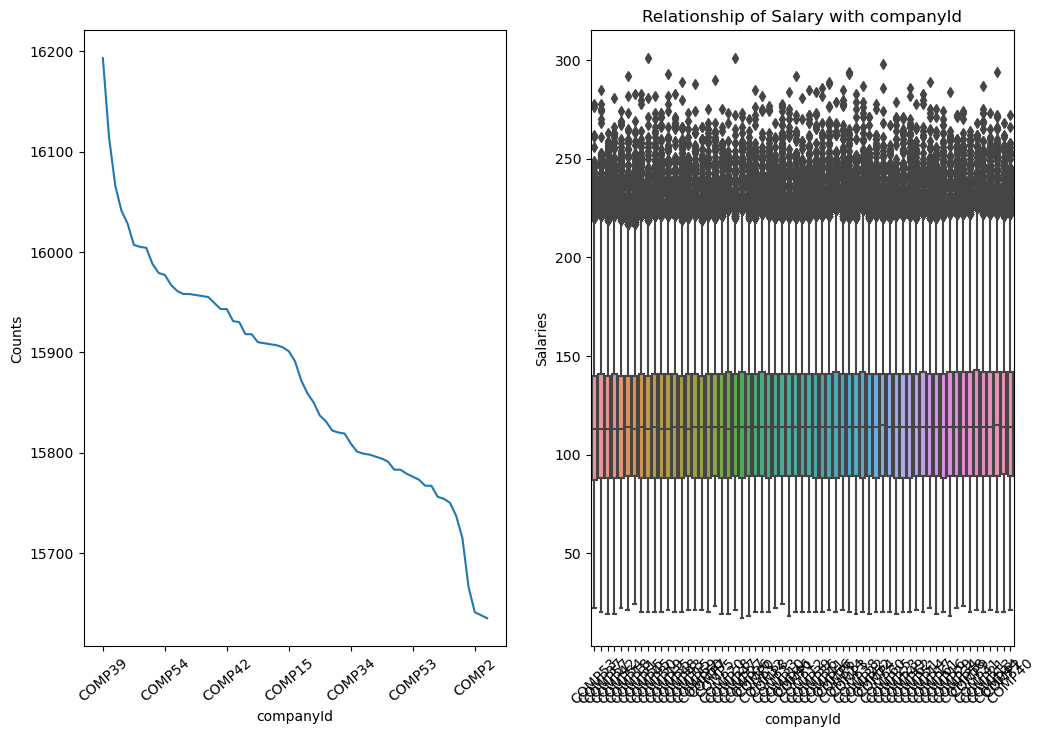

In [39]:
#Correlation between Company ID and Salary
plot_var(train_df, 'companyId')

In [40]:
# drop jobId and companyId 
train_df.drop(['jobId'], axis = 1, inplace = True)
train_df.drop(['companyId'], axis = 1, inplace = True)

In [41]:
train_df.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


Next we visualize each categorical feature to see which features could be good predictors of salary. We use the violin plot here to see the shape of the distribution curve along with mean and interquartile ranges.

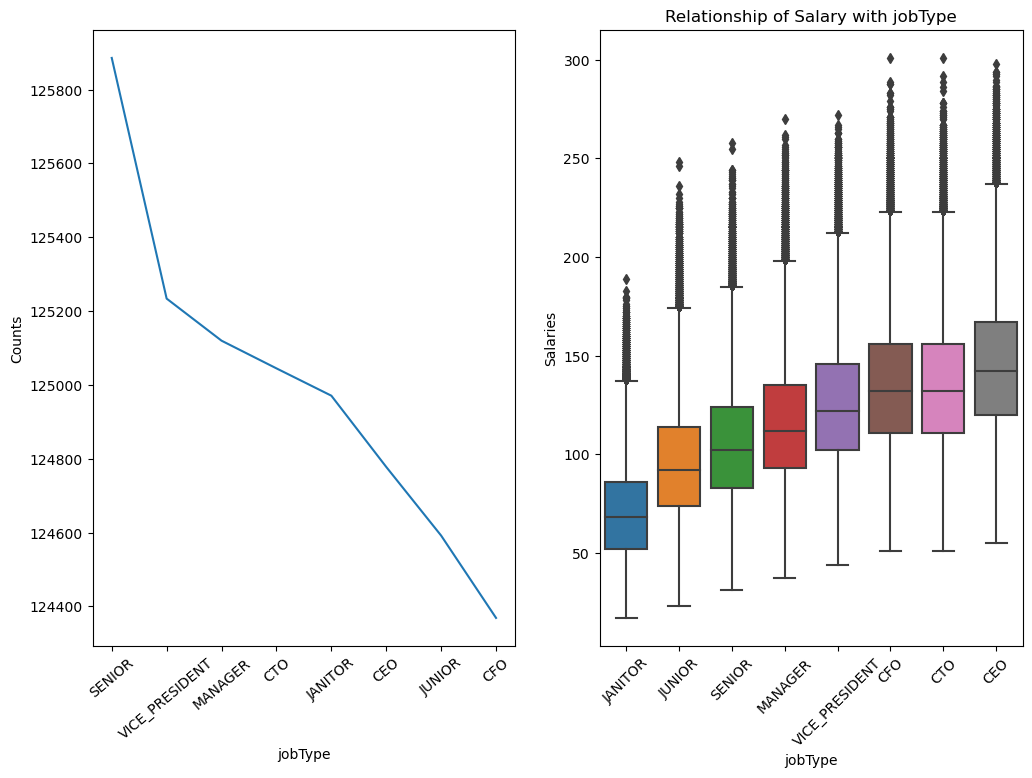

In [42]:
#Correlation between Job Type and Salary
plot_var(train_df, 'jobType')


We can observe a positive correlation between the Job Type and Salaries. To validate further, we can observe that Salaries increase from Janitor roles to those of CFO, CTO and CEOs.

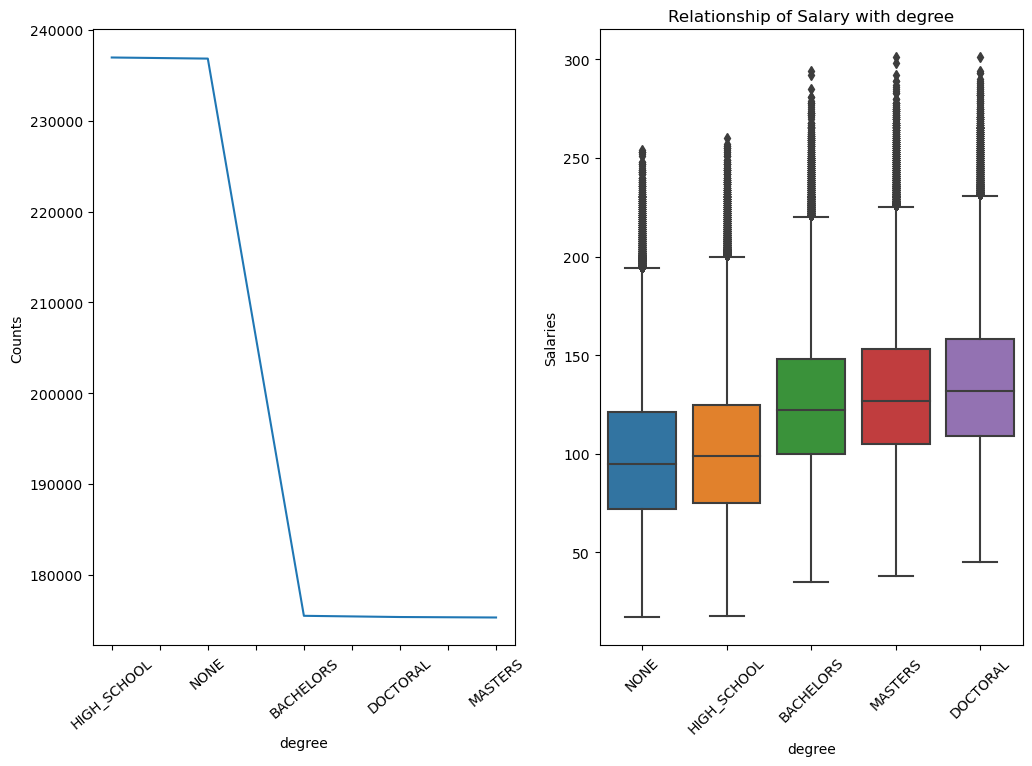

In [43]:
#Correlation between Degree and Salary
plot_var(train_df, 'degree')

We see a positive correlation between deree type and salaries. PhD's earn more than high school graduates or those without any degree.

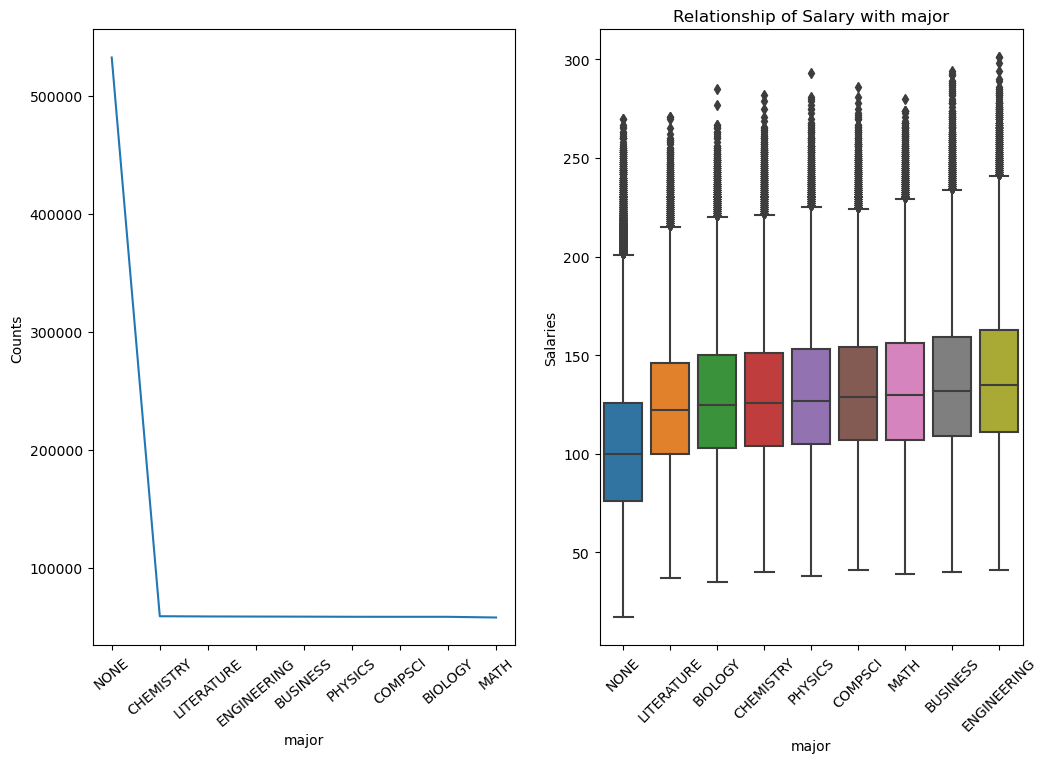

In [44]:
#Correlation between Major and Salary
plot_var(train_df, 'major')

We can see that people with majors such as engineering, business and math have higher salaries. Also, having a major definitely leads to having higher salaries than having no major. Having no major corresponds to people following in the group of no degree and those with only highschool. Distributions appear normal.

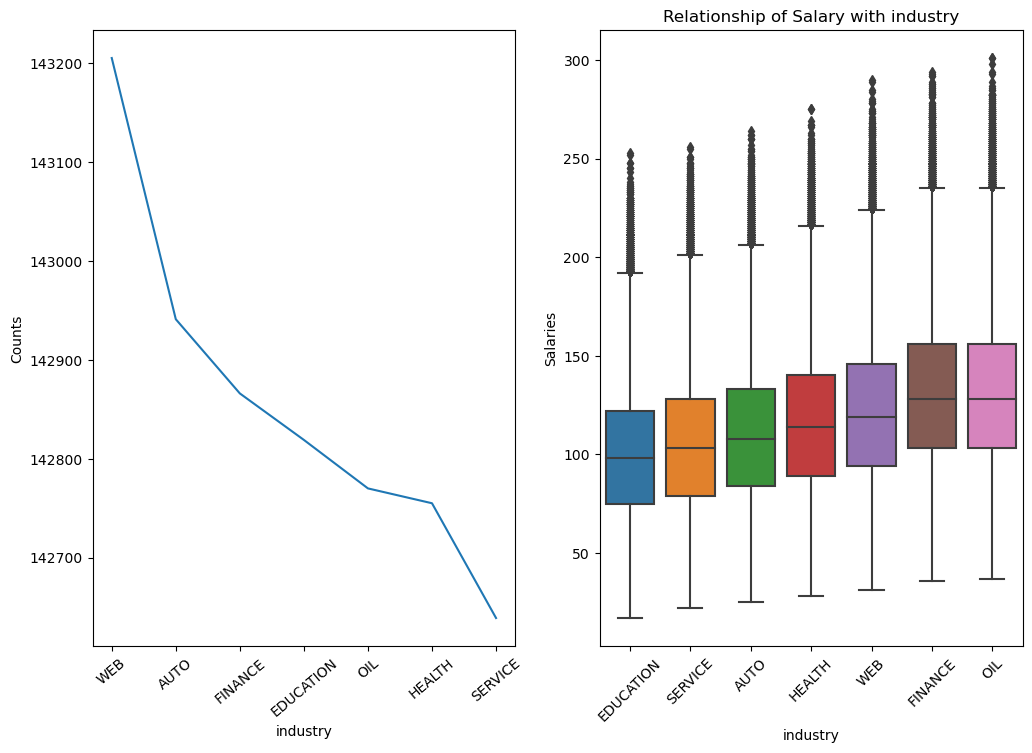

In [45]:
plot_var(train_df, 'industry')

Industries such as Oil pay the highest, followed by finance and web. Education industry seems to pay the lowest.

Now dummy variables will be assigned to categorical data ("one-hot encoding") so it can be used in the prediction models.

In [52]:
#from sklearn.preprocessing import OneHotEncoder
#encoded_data = OneHotEncoder((train_df), num_classes)
#print(encoded_data)

In [53]:
## One-hot encode categorical data in clean_train_df dataset
train_df = pd.get_dummies(train_df)

In [54]:
train_df.head()

,yearsExperience,milesFromMetropolis,salary,jobType_JANITOR,jobType_JUNIOR,jobType_SENIOR,jobType_MANAGER,jobType_VICE_PRESIDENT,jobType_CFO,jobType_CTO,...,major_MATH,major_BUSINESS,major_ENGINEERING,industry_EDUCATION,industry_SERVICE,industry_AUTO,industry_HEALTH,industry_WEB,industry_FINANCE,industry_OIL
0,10,83,130,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,3,73,101,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,10,38,137,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,8,17,142,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,8,16,163,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### Correlation between all the features

<AxesSubplot:>

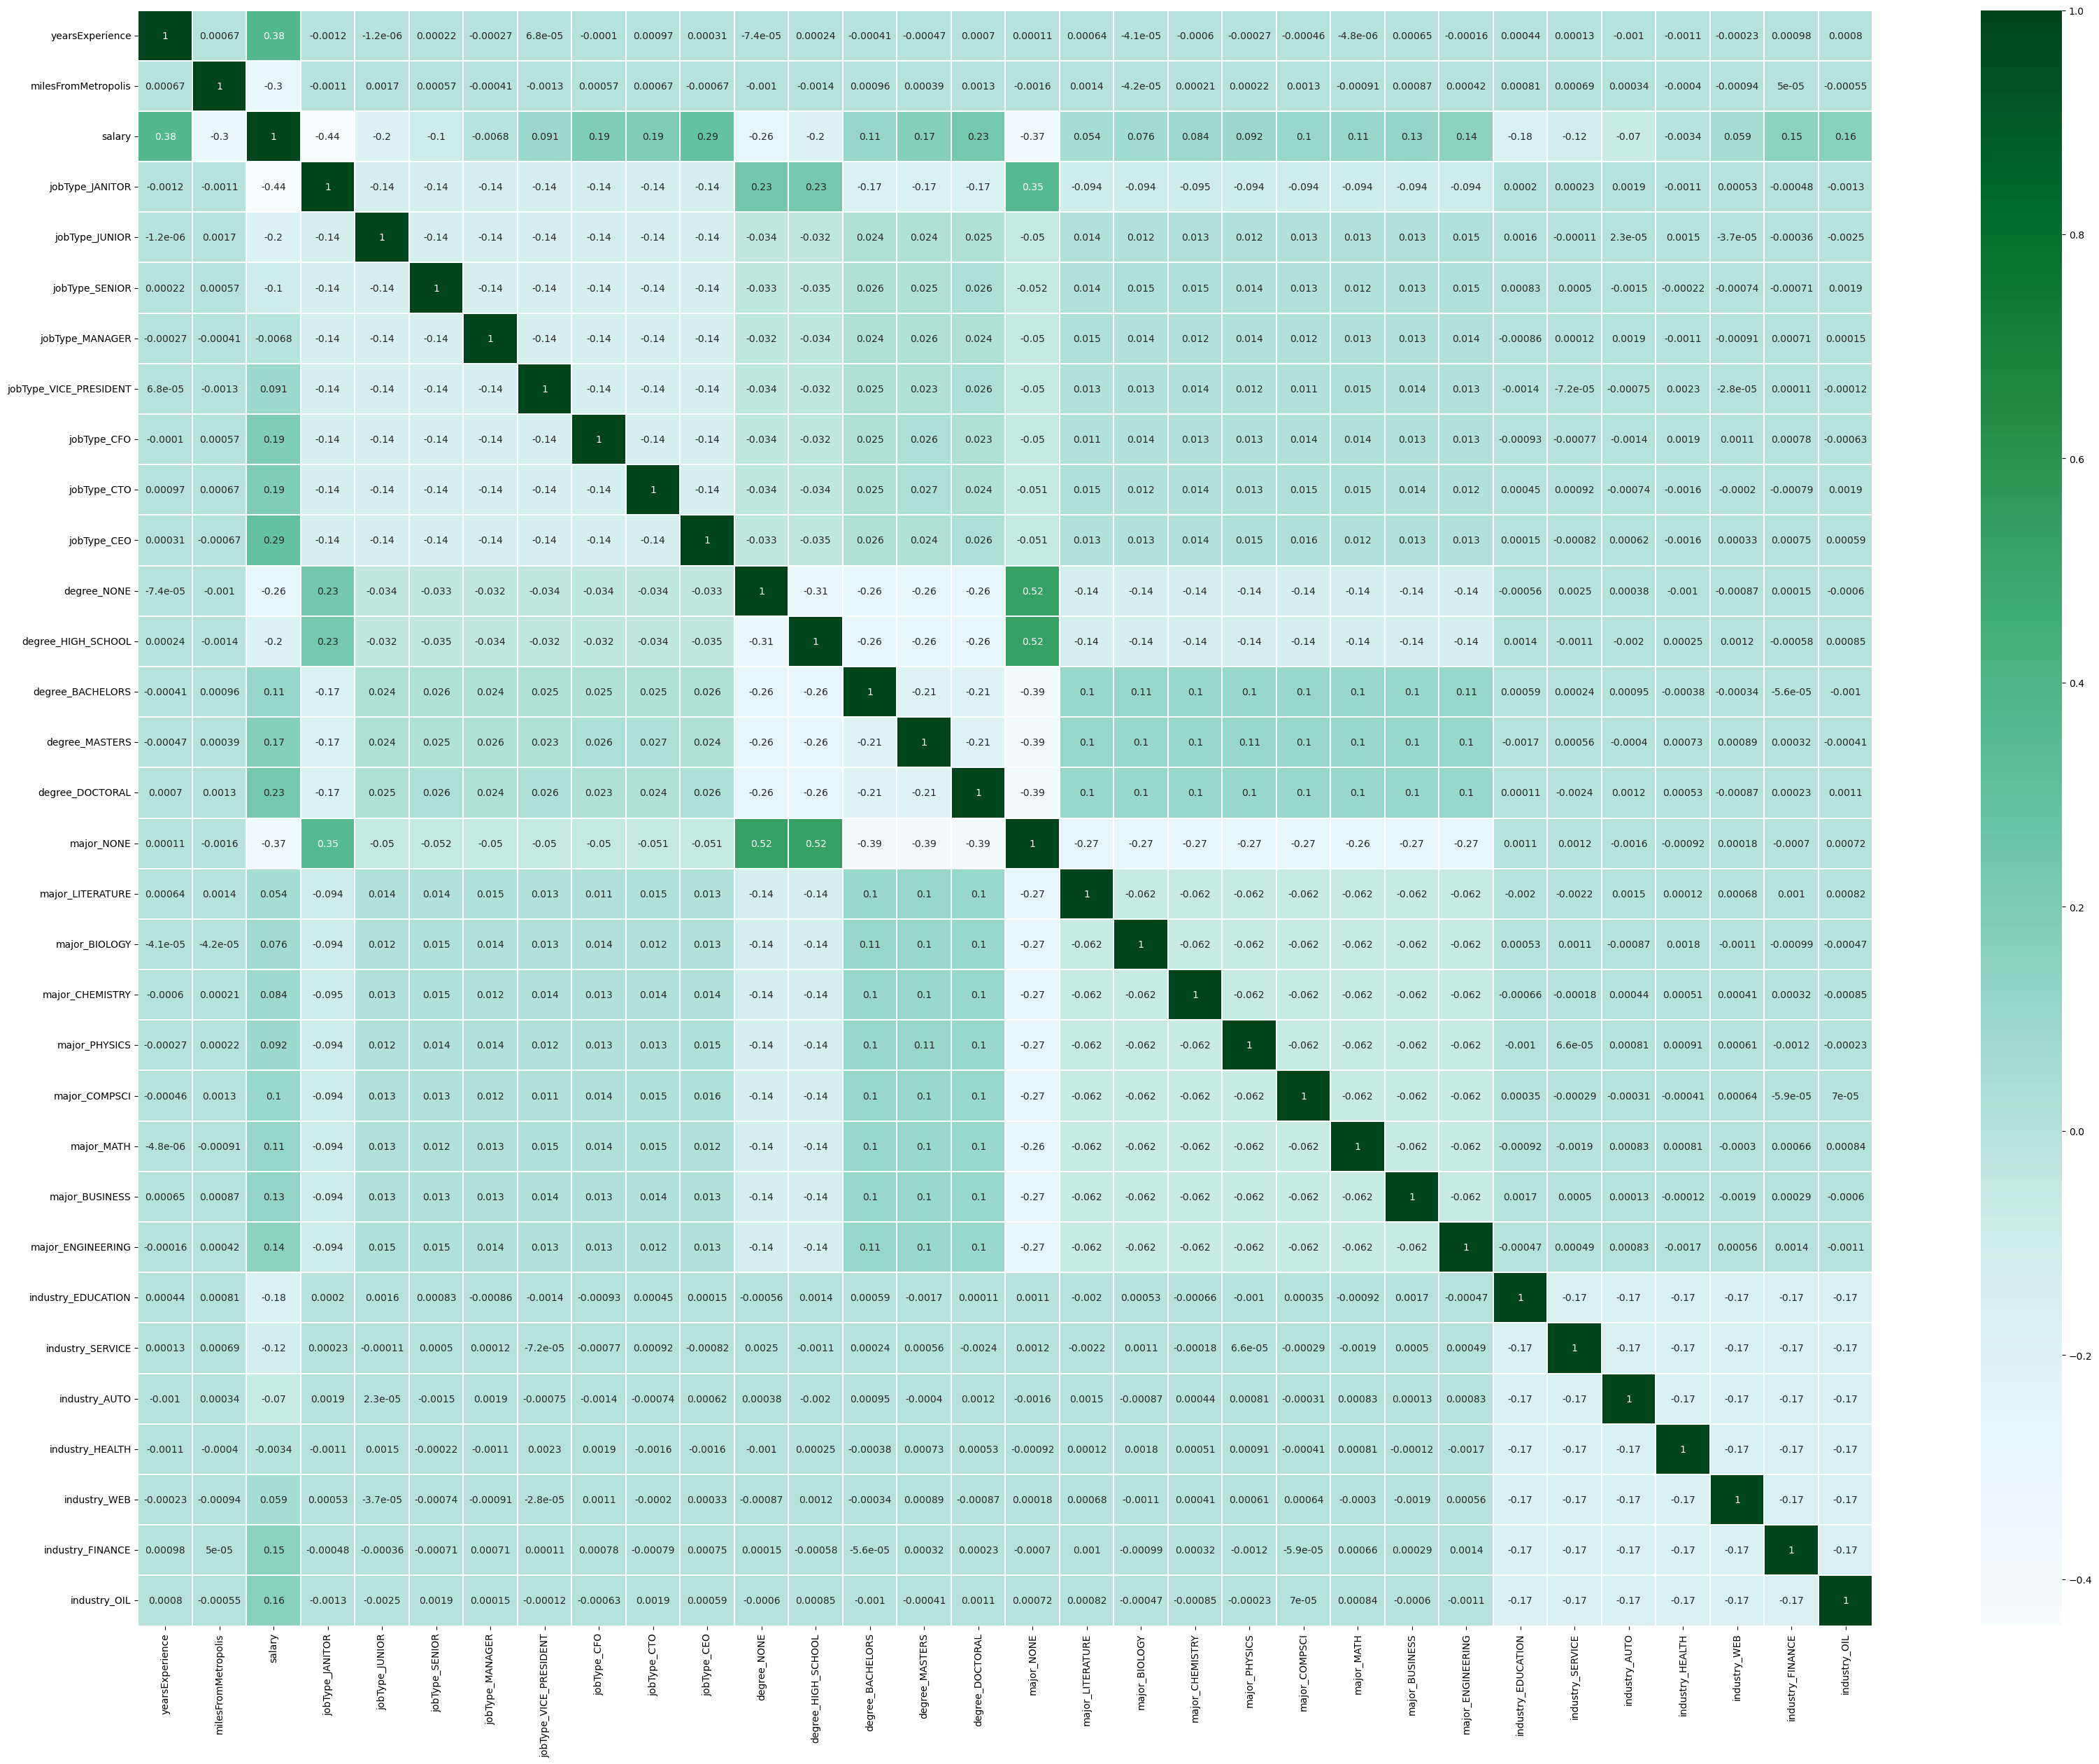

In [55]:
# Plot heatmap of all data with correlation coefficients visible
train_df_corr = train_df.corr()
plt.subplots(figsize=(40,30))
sns.heatmap(train_df_corr, cmap = 'BuGn', linewidth =.005, annot = True)

yearsExperience has the highest correlation with salary. jobType also seems to be correlated with salary.

To create a basic training model Twenty percent of the training data will be split into testing data that we can use to test the model with data for which the salaries are already known.

In [56]:
#Split the data and assign 'salary' to 'sal_df' and the rest of the features to 'feat_df'. 
X = train_df[train_df.loc[ :, train_df.columns != 'salary'].columns]
y = train_df['salary']
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [57]:
X_train.shape

(799996, 31)

In [58]:
X_test.shape

(199999, 31)

In [59]:
y_train.shape

(799996,)

In [60]:
y_test.shape

(199999,)

We will use linear regression here because salary is a continious variable. With all the data, we see that this is a case of Supervised Regression learning. We will establish the baseline model by appling Linear Regression to X_train, y_train.

### Linear Regression

In [61]:
#Create Linear Regression Object and fit the model
lm = LinearRegression()
lm.fit(X_train,y_train)
lm

LinearRegression()

In [62]:
#View coeff of Linear Regression object 
print(lm.intercept_)
print(lm.coef_)

-21867989103.470215
[ 2.01084877e+00 -3.99648460e-01  1.81267320e+10  1.81267320e+10
  1.81267320e+10  1.81267320e+10  1.81267320e+10  1.81267320e+10
  1.81267320e+10  1.81267320e+10  9.71806902e+08  9.71806906e+08
  9.71806911e+08  9.71806916e+08  9.71806921e+08  1.17986561e+09
  1.17986561e+09  1.17986561e+09  1.17986561e+09  1.17986561e+09
  1.17986561e+09  1.17986562e+09  1.17986562e+09  1.17986562e+09
  1.58958467e+09  1.58958467e+09  1.58958468e+09  1.58958468e+09
  1.58958469e+09  1.58958470e+09  1.58958470e+09]


In [63]:
#predict salary using training data
y_pred = lm.predict(X_train)

#View first five predictions -
print('First five predictions:' , y_pred[0:5])

First five predictions: [126.75416565 144.07192993  93.90703201 113.8016243  133.27675629]


### Evaluating Model Accuracy using Metrics like MSE and R^2

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

- R^2 / R-squared Mean Squared Error (MSE)

R-squared R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

- Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

Higher R^2 and lower MSE values are desirable

In [64]:
#print MSE - 
print('Mean Squared Error of our prediction model', mean_squared_error(y_train,y_pred))

Mean Squared Error of our prediction model 384.26948301503705


In [65]:
# accurace of the baseline model using 5-cross validation method -
score = cross_val_score(lm, X_train, y_train, cv = 5)
print('5-Cross Validation accuracy', (np.mean(score)), (np.std(score)))

5-Cross Validation accuracy 0.7433245932384448 0.0005871261949791096


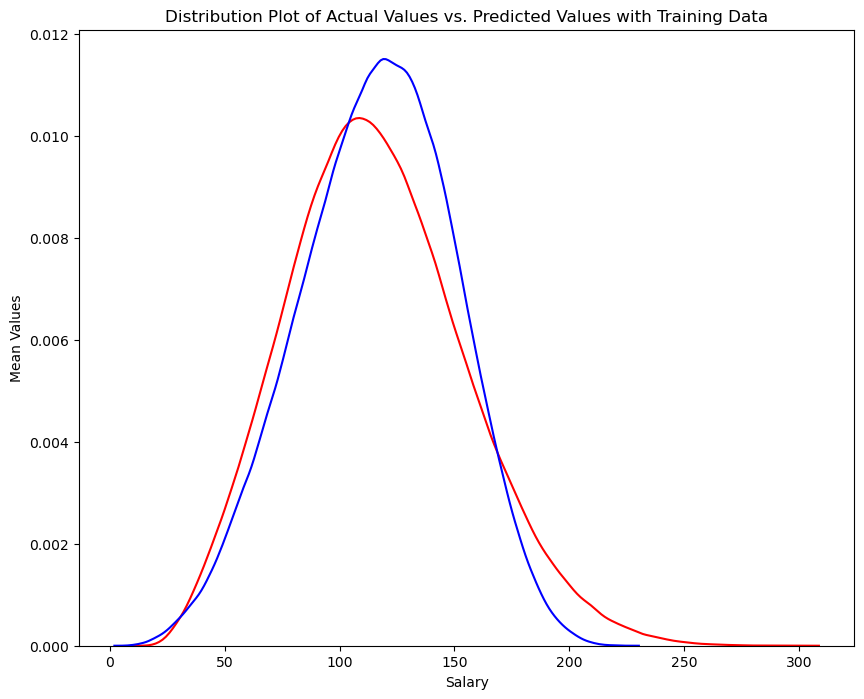

In [66]:
#Defining function for Distribution Plot
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 10
    height = 8
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Salary')
    plt.ylabel('Mean Values')
    plt.show()
    plt.close()

#Distribution plot for the 80% train data
Title = 'Distribution Plot of Actual Values vs. Predicted Values with Training Data'
DistributionPlot(y_train, y_pred, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [67]:
#Distribution plot for the 20% test data
##Predicting the first 5 values
y_pred_test = lm.predict(X_test)
print("First 5 predictios: ", y_pred_test[0:5])

First 5 predictios:  [157.80003738  62.36651611 108.70933151 112.59160995  92.51940155]


In [68]:
#MSE of test data - 
print('Mean Squared Error of test data is', mean_squared_error(y_test, y_pred_test))

Mean Squared Error of test data is 384.8298837484698


We can see that Mean squared error of the training data and test data is very similar.

In [69]:
#accuracy of test data using 5-cross validation method - 
score = cross_val_score(lm, X_test, y_test, cv = 5)
print('5-cross validation accuracy(test data)', (np.mean(score)), (np.std(score)))

5-cross validation accuracy(test data) 0.7443984837769742 0.0027138832562194856


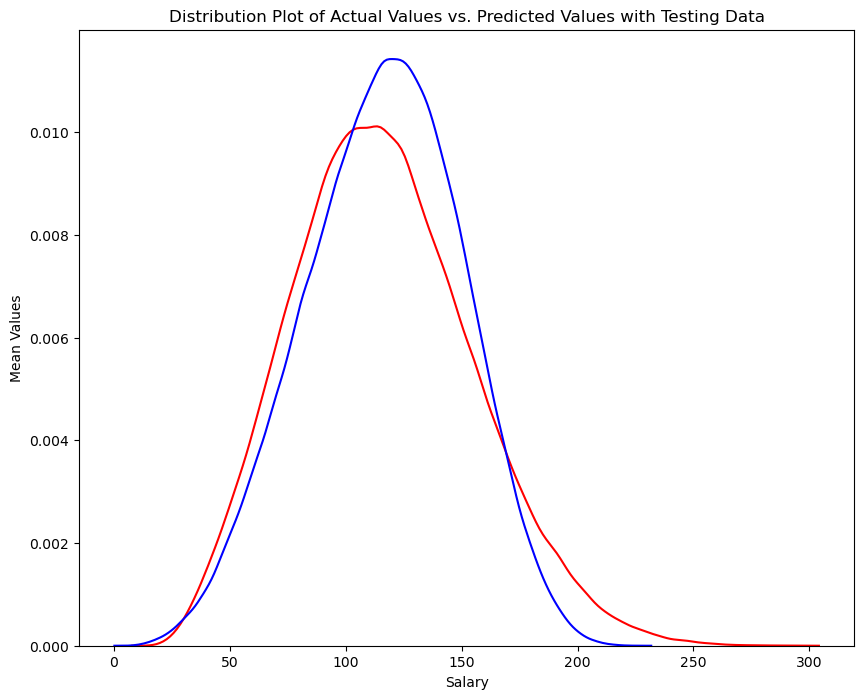

In [70]:
#Distribution plot for the 20% test data

Title = 'Distribution Plot of Actual Values vs. Predicted Values with Testing Data'
DistributionPlot(y_test, y_pred_test, "Actual Values (Test)", "Predicted Values (Test)", Title)

We now have an MSE score of 385 from our baseline model Linear Regression with 74% prediction accuracy. How do we improve this score?

We can attempt to improve this score by comparing our baseline model against the following models -

- Random Forest Regressor
- Gradient Descent


### Random Forest 

In [71]:
#Creating a Random Forest Object
rand = RandomForestRegressor(n_estimators = 60, max_depth = 25, 
                           min_samples_split = 20, n_jobs = 2, 
                           max_features = 30)
print(rand)

RandomForestRegressor(max_depth=25, max_features=30, min_samples_split=20,
                      n_estimators=60, n_jobs=2)


In [72]:
#Fitting the object to training data
rand.fit(X_train, y_train)
rand.score(X_test, y_test)

0.7500778758521017

In [73]:
#Making Predictions on test data
y_pred_test_rand = rand.predict(X_test)
print("First 5 Predictions on test set: ", y_pred_test_rand[0:5])

First 5 Predictions on test set:  [159.09815293  60.32641679  95.20893217  97.75742514  95.36862355]


In [74]:
#Making Predictions on training data
y_pred_train_rand = rand.predict(X_train)
print("First 5 Predictions on test set: ", y_pred_train_rand[0:5])

First 5 Predictions on test set:  [112.92117055 156.75797602  88.33217158 115.82791958 124.40018639]


In [75]:
#Evaluation with MSE
print("Test Data MSE: ", mean_squared_error(y_test, y_pred_test_rand))

#Evaluation with R^2, which is a metric for model prediction accuracy
print('Test Data R-square: ', rand.score(X_test, y_test))

Test Data MSE:  376.3908548456251
Test Data R-square:  0.7500778758521017


### Gradient Boosting Algorithm

In [76]:
#Creating Gradient Boosting Regressor object
gradient = GradientBoostingRegressor(n_estimators =70, max_depth = 5,
                             verbose = 5)

In [77]:
#Fitting object to data
gradient.fit(X_train, y_train)
gradient.score(X_test, y_test)

      Iter       Train Loss   Remaining Time 
         1        1349.8934           55.79s
         2        1228.8101           54.72s
         3        1128.7405           53.67s
         4        1044.5412           52.86s
         5         973.8131           53.46s
         6         912.9784           52.92s
         7         860.9562           52.27s
         8         813.5527           51.84s
         9         771.8185           51.31s
        10         735.6256           50.00s
        11         702.8820           49.34s
        12         675.2100           48.70s
        13         647.1429           47.68s
        14         622.9292           46.68s
        15         602.7250           45.86s
        16         582.9249           44.85s
        17         564.0264           43.89s
        18         547.9513           43.15s
        19         533.2990           42.32s
        20         520.3717           41.37s
        21         509.0961           40.55s
        2

0.7565073298226239

In [78]:
#Making Predictions and calculating MSE
gradient_pred = gradient.predict(X_test)
mean_squared_error(gradient_pred, y_test)

366.70788786378483

While the MSE obtained with Random Forest is better than our Baseline Model but gradient boost outperformed Random forest here with MSE=366 and a accuracy of 75.65%.